<a href="https://colab.research.google.com/github/afonsosr2/bootcamp_DS_Alura/blob/main/Bootcamp_DS_Mod01_Aula01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bootcamp Data Science Aplicada

### **Organização:**
Alura Github: https://github.com/alura-cursos

LinkedIn: https://www.linkedin.com/school/aluracursos/

<br>

### **Resolução das aulas e desafios por:**
Afonso Augusto Rios
<br>
Email: afonsosr2@gmail.com

Github: https://github.com/afonsosr2

LinkedIn: https://www.linkedin.com/in/afonsosr2/

# Módulo 01 - Visualizando dados do SUS

## Aula 01
*   Acompanhamento da Aula 01
*   Resolução dos Desafios



Olá, iniciaremos as práticas, análises e estudos sobre dados relativos à saúde no Brasil através do Bootcamp de Data Science Aplicada da Alura. 

Ao longo das aulas vou aplicar o conteúdo aprendido dentro desse curso e resolver os desafios, aproveitando também para fazer minhas próprias análises e olhando os dados de forma mais crítica. 

Vamos começar nosso mergulho? 

### Importando a Base de Dados



Para a nossa primeira análise, vamos importar os dados do site da DATASUS disponibilizados no [link](https://datasus.saude.gov.br/informacoes-de-saude-tabnet/).

Na Aula 01 do Módulo 01 vamos explorar os dados relativos aos Procedimentos Hospitalares do SUS de 2008 até os dias atuais. 

Inicialmente, vamos selecionar os dados dos Procedimentos Hospitalares do SUS levando em conta o valor total dos gastos no ano/mês de processamento por Unidade Federativa.

In [2]:
#importando a biblioteca do Pandas para a leitura dos dados através de um arquivo .csv
import pandas as pd

dados = pd.read_csv("https://raw.githubusercontent.com/afonsosr2/bootcamp_DS_Alura/main/dados/A095413189_28_143_208.csv", encoding="UTF-8",
                    skiprows = 3, sep=";", skipfooter = 12, thousands = ".",
                    decimal = ",")
dados

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  


,Unidade da Federação,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,...,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total
0,11 Rondônia,1388528.39,2.931283e+06,1.541683e+06,1.525315e+06,1.645954e+06,1.406151e+06,3.065279e+06,3.231495e+06,3.117179e+06,3.068430e+06,2.825839e+06,2.931174e+06,2.885269e+06,2.860104e+06,3.684945e+06,3.607290e+06,3.774357e+06,3.706712e+06,3.763188e+06,3.533626e+06,3605007.43,3.907033e+06,3.939821e+06,3.901084e+06,3.684407e+06,3.623016e+06,3.890462e+06,4.193534e+06,4.534401e+06,4.451208e+06,4.874593e+06,4.460802e+06,5.067886e+06,4.511093e+06,4.394680e+06,4.098742e+06,4.411499e+06,3.868618e+06,4.298703e+06,...,7.998346e+06,8.893684e+06,8.867793e+06,8.871408e+06,8.501602e+06,8.315108e+06,8.525500e+06,9.177611e+06,7.368996e+06,8.835095e+06,8.328187e+06,8.408513e+06,9.351706e+06,8.143008e+06,8.949742e+06,9.630553e+06,9.581970e+06,7.891114e+06,9.792371e+06,9.170788e+06,8.816847e+06,1.002455e+07,9.675424e+06,8.085026e+06,9.222011e+06,7.493901e+06,8.148169e+06,7.353768e+06,7.739864e+06,9.246098e+06,1.182469e+07,1.173331e+07,1.020199e+07,7.955139e+06,9.357946e+06,8.880837e+06,9.266015e+06,7.730597e+06,1.102331e+07,9.964113e+08
1,12 Acre,902416.00,1.497206e+06,1.794028e+06,1.730469e+06,1.819444e+06,1.828496e+06,2.511755e+06,2.089107e+06,2.275709e+06,1.923887e+06,1.756987e+06,2.235640e+06,2.497116e+06,2.253558e+06,2.122674e+06,2.834318e+06,2.722066e+06,2.432832e+06,2.630191e+06,2.307579e+06,-,2.826477e+06,2.170791e+06,2.541526e+06,2.491042e+06,1.954474e+06,2.389996e+06,2.654879e+06,2.844085e+06,2.336207e+06,2.125143e+06,2.430294e+06,2.377738e+06,2.184747e+06,2.468453e+06,2.516285e+06,3.051370e+06,2.629104e+06,2.485452e+06,...,3.576595e+06,2.444567e+06,2.602434e+06,3.064163e+06,2.276237e+06,3.239474e+06,3.126430e+06,2.998866e+06,2.619710e+06,3.018049e+06,3.342614e+06,2.123426e+06,2.664655e+06,1.906430e+06,3.096440e+06,2.411628e+06,2.840631e+06,3.260154e+06,3.250723e+06,3.204999e+06,3.052746e+06,3.124802e+06,3.021522e+06,2.874871e+06,3.331804e+06,3.417691e+06,3.076003e+06,2.286643e+06,2.896340e+06,3.045246e+06,3.915193e+06,3.640143e+06,3.391242e+06,4.044321e+06,3.276590e+06,3.696997e+06,3.715723e+06,3.538428e+06,4.077046e+06,4.500485e+08
2,13 Amazonas,4735529.42,7.118991e+06,8.196635e+06,8.259378e+06,7.831400e+06,8.477274e+06,9.368859e+06,9.352533e+06,9.363099e+06,8.618319e+06,6.555549e+06,7.777646e+06,7.403068e+06,6.683347e+06,9.927781e+06,8.844511e+06,9.079036e+06,8.832895e+06,9.373396e+06,9.578326e+06,9730634.16,9.179253e+06,8.314649e+06,9.050439e+06,9.419461e+06,8.680179e+06,9.168055e+06,9.897902e+06,9.651362e+06,1.085460e+07,1.041712e+07,8.718347e+06,8.221592e+06,9.613977e+06,9.927574e+06,9.470661e+06,9.736751e+06,8.745260e+06,9.380112e+06,...,1.357226e+07,1.308308e+07,1.432231e+07,1.464334e+07,1.463221e+07,1.450052e+07,1.484053e+07,1.442762e+07,1.581896e+07,1.635846e+07,1.539116e+07,1.415436e+07,1.679140e+07,1.436999e+07,1.633902e+07,1.562291e+07,1.648317e+07,1.542224e+07,1.596199e+07,1.578790e+07,1.651544e+07,1.578885e+07,1.578469e+07,1.438861e+07,1.606345e+07,1.493998e+07,1.510706e+07,1.353466e+07,1.969875e+07,2.112939e+07,1.976946e+07,1.805993e+07,1.784102e+07,1.640832e+07,1.989562e+07,1.776517e+07,2.143029e+07,2.591713e+07,2.203218e+07,1.917248e+09
3,14 Roraima,657889.53,7.779393e+05,7.186880e+05,8.399944e+05,8.623480e+05,8.324407e+05,9.966931e+05,8.942712e+05,9.104242e+05,1.191770e+06,1.056219e+06,1.24

In [3]:
# Modificando o modo de leitura dos valores totais dos gastos.
pd.options.display.float_format = "{:.2f}".format

In [4]:
# Testando o modo de leitura imprimindo as médias dos gastos por ano
dados.mean()

2008/Jan     15126846.64
2008/Fev     22710158.12
2008/Mar     24594187.35
2008/Abr     25431957.83
2008/Mai     26511245.91
                ...     
2020/Dez     53377763.15
2021/Jan     56073748.02
2021/Fev     55578233.31
2021/Mar     62502301.42
Total      6388213338.48
Length: 159, dtype: float64

Nesse ponto, podemos notar que algo não funcionou corretamente. Afinal de contas, temos 161 colunas no DataFrame e tirando a Unidade de Federação, que faz sentido ser do tipo object, não temos 160 valores do tipo float64. Ou seja, alguma coluna está sendo identificada como outro tipo. 

Vamos avaliar?

Primeiro, vamos olhar os tipos de dados.

In [5]:
dados.info(null_counts=True, verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 161 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unidade da Federação  27 non-null     object 
 1   2008/Jan              27 non-null     float64
 2   2008/Fev              27 non-null     float64
 3   2008/Mar              27 non-null     float64
 4   2008/Abr              27 non-null     float64
 5   2008/Mai              27 non-null     float64
 6   2008/Jun              27 non-null     float64
 7   2008/Jul              27 non-null     float64
 8   2008/Ago              27 non-null     float64
 9   2008/Set              27 non-null     float64
 10  2008/Out              27 non-null     float64
 11  2008/Nov              27 non-null     float64
 12  2008/Dez              27 non-null     float64
 13  2009/Jan              27 non-null     float64
 14  2009/Fev              27 non-null     float64
 15  2009/Mar              27

Agora é possível notar que temos realmente duas colunas com valores do tipo object. 

Uma delas obviamente a nossa Unidade de Federação e a outra 2009/Set. 

Vamos ver o que pode ter acontecido?


In [6]:
dados[["Unidade da Federação", "2009/Set"]]

,Unidade da Federação,2009/Set
0,11 Rondônia,3605007.43
1,12 Acre,-
2,13 Amazonas,9730634.16
3,14 Roraima,1701611.25
4,15 Pará,27967969.22
5,16 Amapá,2034329.78
6,17 Tocantins,6542918.14
7,21 Maranhão,19722895.51
8,22 Piauí,12247027.29
9,23 Ceará,34471579.06


Podemos notar que na linha do Estado do Acre temos "-" ao invés de um número. Esse problema pode ser solucionado de algumas formas: uma delas pode ser fazendo uma média aritmética entre o mês anterior e o posterior ou, por exemplo, trocando o "-" por zero. 

No nosso caso, optarei pela primeira proposta.



In [7]:
media_set2009_acre = (dados["2009/Ago"][1] + dados["2009/Out"][1])/2

In [8]:
#Trocando o "-" do nosso dataframe pela média dos meses imediatamente anteriores e posteriores 
dados["2009/Set"].replace("-", media_set2009_acre, inplace=True)

# E transformando nossa Serie de dados de Setembro de 2009 no tipo float64
dados['2009/Set'] = dados['2009/Set'].astype('float64')

# Testando se os tipos dos dados foram atualizados
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Columns: 161 entries, Unidade da Federação to Total
dtypes: float64(160), object(1)
memory usage: 34.1+ KB


### Visualização de uma pequena amostra dos dados

Agora, vamos fazer uma breve exploração do período mais atual (Mar/2021) e plotar o gráfico com os valores totais dos gastos por unidade de federação para fixar o conteúdo de visualizações por gráficos.

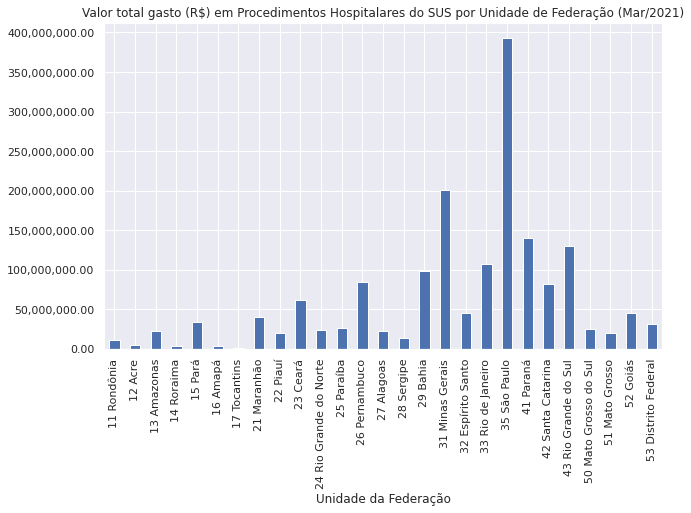

In [9]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

ax = dados.plot(x="Unidade da Federação", y="2021/Mar", kind="bar", figsize=(10, 6), legend=None)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))

plt.title("Valor total gasto (R$) em Procedimentos Hospitalares do SUS por Unidade de Federação (Mar/2021)")
plt.show()

Vamos fazer algumas alterações nos gráficos para deixá-lo mais organizado e fácil de se ler.

Primeiro tiraremos os números na frente dos estados para não poluir o visual e guardaremos no final de nosso Dataframe, caso seja necessário utilizá-lo em situações futuras.





In [10]:
dados["id_uf"] = dados["Unidade da Federação"].str.slice(stop = 2)
dados["id_uf"]

0     11
1     12
2     13
3     14
4     15
5     16
6     17
7     21
8     22
9     23
10    24
11    25
12    26
13    27
14    28
15    29
16    31
17    32
18    33
19    35
20    41
21    42
22    43
23    50
24    51
25    52
26    53
Name: id_uf, dtype: object

Em seguida, vamos atualizar a nossa primeira coluna "Unidade da Federação" com apenas os nomes dos estados.

In [11]:
dados["Unidade da Federação"] = dados["Unidade da Federação"].str.slice(start=3)

Agora, vamos verificar a criação de mais uma nova coluna "id_uf" e o ajuste de nossa coluna com o nome dos estados.

In [12]:
dados.head()

,Unidade da Federação,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,...,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total,id_uf
0,Rondônia,1388528.39,2931283.42,1541682.52,1525314.96,1645953.84,1406150.68,3065279.01,3231494.61,3117178.63,3068430.44,2825838.52,2931173.58,2885269.07,2860103.74,3684944.68,3607289.68,3774356.60,3706711.84,3763187.55,3533625.83,3605007.43,3907032.72,3939820.71,3901084.11,3684407.02,3623015.58,3890461.90,4193533.87,4534400.67,4451208.03,4874592.78,4460802.38,5067886.24,4511092.85,4394680.50,4098741.80,4411499.48,3868617.95,4298702.78,...,8893683.69,8867793.32,8871408.50,8501601.67,8315107.81,8525499.78,9177611.46,7368996.38,8835095.43,8328186.64,8408512.77,9351705.82,8143007.97,8949741.77,9630553.15,9581970.31,7891114.05,9792370.67,9170787.53,8816846.71,10024554.15,9675423.70,8085025.66,9222010.60,7493901.30,8148169.46,7353768.37,7739864.47,9246097.96,11824687.13,11733307.76,10201985.14,7955139.45,9357946.29,8880836.55,9266014.59,7730597.04,11023309.47,996411254.68,11
1,Acre,902416.00,1497206.26,1794028.48,1730469.42,1819443.92,1828496.00,2511754.59,2089107.14,2275708.53,1923886.57,1756986.80,2235639.98,2497116.43,2253558.01,2122673.92,2834317.62,2722065.97,2432831.95,2630190.65,2307579.00,2567028.01,2826477.02,2170791.18,2541526.44,2491042.33,1954473.90,2389996.38,2654878.60,2844085.21,2336207.19,2125143.06,2430293.67,2377738.44,2184746.84,2468452.90,2516284.54,3051370.08,2629104.42,2485451.79,...,2444567.37,2602434.35,3064163.42,2276236.69,3239474.10,3126429.88,2998865.51,2619709.86,3018048.94,3342614.24,2123426.26,2664654.52,1906429.95,3096439.63,2411628.00,2840630.58,3260153.59,3250722.84,3204998.88,3052745.65,3124802.29,3021521.75,2874871.28,3331803.55,3417691.07,3076003.20,2286642.60,2896340.24,3045245.80,3915193.20,3640142.82,3391242.21,4044321.44,3276590.10,3696997.31,3715723.12,3538427.92,4077045.92,450048530.47,12
2,Amazonas,4735529.42,7118990.57,8196635.49,8259378.42,7831399.90,8477273.62,9368858.72,9352532.70,9363099.35,8618318.83,6555549.08,7777645.88,7403068.36,6683346.89,9927781.20,8844511.21,9079035.96,8832894.53,9373395.97,9578326.03,9730634.16,9179252.65,8314648.93,9050439.39,9419460.86,8680178.57,9168055.41,9897901.80,9651362.37,10854599.47,10417122.89,8718347.13,8221592.12,9613977.03,9927574.41,9470661.21,9736750.91,8745259.80,9380112.36,...,13083081.70,14322305.22,14643340.51,14632208.09,14500521.14,14840533.42,14427620.91,15818964.25,16358462.57,15391163.74,14154362.85,16791397.31,14369987.43,16339024.96,15622910.63,16483166.92,15422243.28,15961988.04,15787896.78,16515441.67,15788848.91,15784686.14,14388606.82,16063450.73,14939977.20,15107056.74,13534657.88,19698748.89,21129394.43,19769460.14,18059931.43,17841015.63,16408315.10,19895617.91,17765167.69,21430289.17,25917134.55,22032176.22,1917247936.05,13
3,Roraima,657889.53,777939.31,718688.03,839994.39,862347.96,832440.66,996693.09,894271.18,910424.17,1191770.32,1056218.71,1244339.25,1085679.25,969528.54,1393226.70,1273734.17,1552638.50,1490587.74,1596751.80,1848998.68,1701611.25,1164711.18,1434809.17,1603817.28,1437340.80,1332094.01,1900513.75,1933875.49,1773958.29,1804729.73,1846639.32,1643518.23,1843163.29,1807885.17,1674871.65,1250999.28,1257275.43,1171045.72,1389668.67,...,2881281.13,2740423.51,2695484.62,2613895.43,3020718.84,2860584.22,2740088.01,2689103.41,2985029.23,2771881.20,2938769.32,2527888.58,2587642.41,1923440.17,2422446

Após o ajuste, vamos criar um gráfico mais adequado usando a biblioteca Seaborn. No código é possível ver alguns comentários sobre as escolhas e o que faz cada trecho.

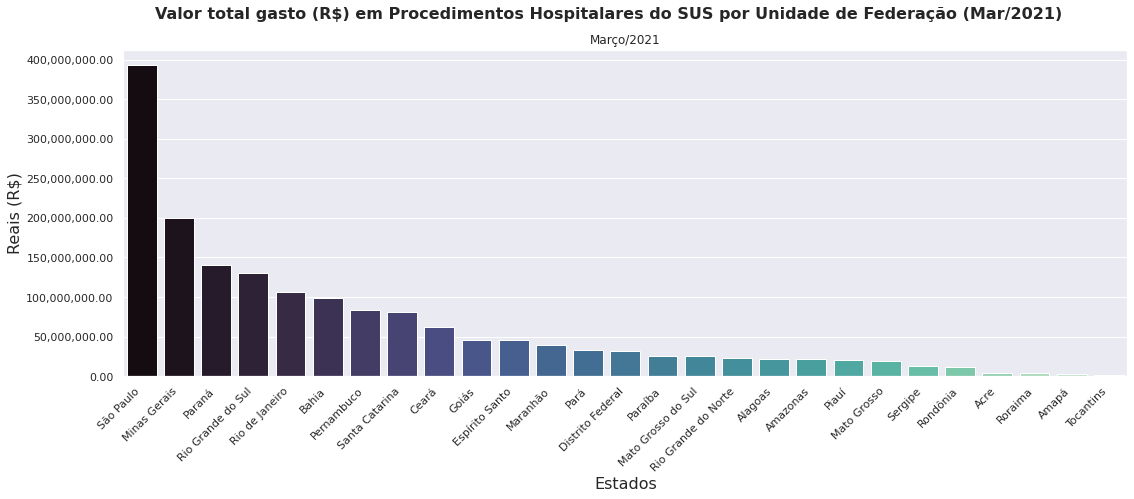

In [19]:
#Importando as bibliotecas necessárias
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Driblando um pequeno bug do Seaborn no Jupyter Notebook e configurando o tamanho de nossa figura
sns.set()
plt.figure(figsize=(18, 6))

# Setando a ordem do gráfico de acordo com os estados que mais gastam de maneira decrescente no período de Marcço de 2021.
dados_atuais = dados.sort_values(by="2021/Mar", ascending=False)

#Desenhando um gráfico de barras e colocando o valor do gasto de maneira que fique mais fácil a leitura
ax = sns.barplot(data= dados_atuais, x= "Unidade da Federação", y= "2021/Mar", palette="mako")
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))

# Adicionando título e subtítulo em nosso gráfico e ajustando nomeando os eixos
plt.suptitle("Valor total gasto (R$) em Procedimentos Hospitalares do SUS por Unidade de Federação (Mar/2021)",
             size = 16, weight='bold')
plt.title("Março/2021")
plt.ylabel("Reais (R$)", fontdict={'fontsize': 16})
plt.xlabel("Estados", fontdict={'fontsize': 16})

# Ajustando a posição das variáveis dos estados no eixo horizontal para caberem na tela corretamente e não dificultar a leitura
ax.set_xticklabels(dados_atuais["Unidade da Federação"], rotation= 45, horizontalalignment = "right" )

# Oculta as informações no topo do gráfico
plt.show()